<a href="https://colab.research.google.com/github/jr-gumtau/datascience15/blob/main/Project_6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition


The goal is to build a neural network that can predict whether the animal within the image is a cat or a dog. This is an unsupervised classification problem.


In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [2]:
Xurl = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
Yurl = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

testimage = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [3]:
XLoad_Data = pd.read_pickle(Xurl)
YLoad_Data = pd.read_pickle(Yurl)

In [4]:
X = XLoad_Data.copy()
y = YLoad_Data.copy()

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using plt.imshow().

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [5]:
y = np.array(y)

In [6]:
X.shape, y.shape

((24946, 100, 100, 1), (24946,))

In [7]:
X_scaled = X / 255

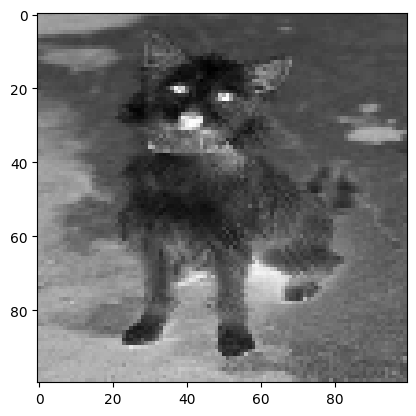

In [8]:
# shrink datasets to a workable amount
plt.imshow(X_scaled[0], cmap= "gray_r")

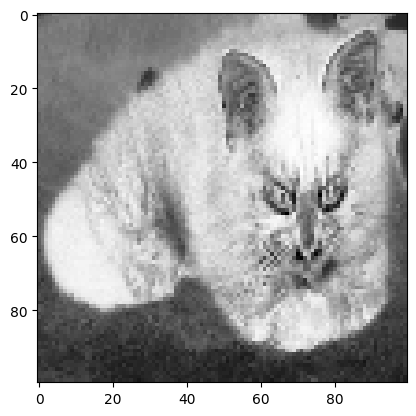

In [9]:
plt.imshow(X_scaled[1], cmap= "gray_r")

In [10]:
y[0] # 0 is dogs and 1 is cats

0

## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19956, 100, 100, 1), (4990, 100, 100, 1), (19956,), (4990,))

In [13]:
model = Sequential()

In [14]:
# define input layer
model.add(
    Conv2D
    (32, (3, 3),
    activation='relu',
    input_shape=(100, 100, 1))
          )

model.add(
    MaxPooling2D(
        (2, 2))
          )

# define hidden second layer
model.add(
    Conv2D
    (64, (3, 3),
    activation='relu')
          )

model.add(
    MaxPooling2D(
        (2, 2))
          )

# define output layer
model.add(
    Flatten()
          )

model.add(
    Dense(
        name = 'output',
        units = 1,
        activation='sigmoid')
          )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Fit Model

In [16]:
# fit model
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6089 - loss: 0.6458 - val_accuracy: 0.7483 - val_loss: 0.5105
Epoch 2/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7617 - loss: 0.4998 - val_accuracy: 0.7888 - val_loss: 0.4671
Epoch 3/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8019 - loss: 0.4379 - val_accuracy: 0.8004 - val_loss: 0.4415
Epoch 4/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8210 - loss: 0.4002 - val_accuracy: 0.7948 - val_loss: 0.4396
Epoch 5/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8374 - loss: 0.3648 - val_accuracy: 0.8114 - val_loss: 0.4201
Epoch 6/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8620 - loss: 0.3292 - val_accuracy: 0.8132 - val_loss: 0.4225
Epoch 7/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8701 - loss: 0.3035 - val_accuracy: 0.7764 - val_loss: 0.5078
Epoch 8/8
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8820 - loss: 0.2773 - val_accuracy:

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │          33,857 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,021 (617.27 KB)

 Trainable params: 52,673 (205.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,348 (411.52 KB)

In [27]:
# testing the model with testing set
val_loss, val_acc = model.evaluate(X_test, y_test)
val_loss, val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4178


(0.4235997796058655, 0.820641279220581)

In [20]:
import glob
import os
import cv2
import requests
import io
from PIL import Image

In [25]:
# make a function to run your model on the testimage
def predict_image(image_path):
    '''this function fetches an image, converts it into a numpy array, resizes the image, and runs it through the model'''

    # using image_path which was passed as an argument instead of undefined url
    response = requests.get(image_path, stream=True)
    img = Image.open(io.BytesIO(response.content)).convert('L')
    img = np.array(img)

    img = cv2.resize(img, (100, 100))
    img = img.reshape(1, 100, 100, 1)
    img = img / 255

    prediction = model.predict(img)

    if prediction < 0.5:
        prediction = 'cat'
    else:
        prediction = 'dog'

    return prediction

In [26]:
predict_image(testimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'dog'

## Communication of Results



* Communicate the results of your analysis.



Our convolutional neural network accomplished:
- an accuracy of .82 and a loss of .4
- we could probably achieve better accuracy, but the model did it's job

## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.